In [ ]:
from PyQt5 import QtWidgets
app = QtWidgets.QApplication([])
window = QtWidgets.QWidget()
window.setWindowTitle('Hello World')
window.show()
app.exec_()


In [1]:
from PyQt5 import QtWidgets


In [3]:
from pathlib import Path
import os
from time import time
import numpy as np
import pandas as pd
import yaml

from GeoTiff import load_GeoTiff
from visualise_labels import scale_sentinel_1_image, SARFish_Plot
from SARFish_metric import score

In [4]:
#%gui qt

In [5]:



rng = np.random.default_rng(1234)


pd.set_option('display.max_columns', None)

In [6]:
SARFish_root_directory ="../../data/"

In [7]:
xView3_SLC_GRD_correspondences = pd.read_csv("../../data/SARFish" + "/labels/xView3_SLC_GRD_correspondences.csv")

In [8]:
correspondence = xView3_SLC_GRD_correspondences.iloc[703:704].squeeze()
correspondence

DATA_PARTITION                                                      validation
scene_id                                                     5c3d986db930f848v
GRD_product_identifier       S1B_IW_GRDH_1SDV_20200803T075721_20200803T0757...
GRD_md5sum                                    3f8ec460304f087c8f9a59b7c0897561
GRD_vh                       s1b-iw-grd-vh-20200803t075721-20200803t075746-...
GRD_vv                       s1b-iw-grd-vv-20200803t075721-20200803t075746-...
GRD_vh_annotation            s1b-iw-grd-vh-20200803t075721-20200803t075746-...
GRD_vv_annotation            s1b-iw-grd-vv-20200803t075721-20200803t075746-...
SLC_product_identifier       S1B_IW_SLC__1SDV_20200803T075720_20200803T0757...
SLC_md5sum                                    c32f40b7d3a1304a30c287d7eae75684
SLC_swath_1_vh               s1b-iw1-slc-vh-20200803t075720-20200803t075748...
SLC_swath_1_vv               s1b-iw1-slc-vv-20200803t075720-20200803t075748...
SLC_swath_1_vh_annotation    s1b-iw1-slc-vh-20200803

In [9]:
SARFish_root_directory = "../../data/"

In [10]:
measurement_path_GRD = Path(
    SARFish_root_directory, "GRD", correspondence['DATA_PARTITION'], f"{correspondence['GRD_product_identifier']}.SAFE",
    "measurement", correspondence[f'GRD_vh']
)
str(measurement_path_GRD)

'../../data/GRD/validation/S1B_IW_GRDH_1SDV_20200803T075721_20200803T075746_022756_02B2FF_033A.SAFE/measurement/s1b-iw-grd-vh-20200803t075721-20200803t075746-022756-02b2ff-002_SARFish.tiff'

The image is loaded into numpy arrays using the provided GeoTiff.load_Geotiff function. The function returns an array of image data, and a second array masking the no data areas. Since the data is in linear scale, we use the provided scaling function visualise\_labels.scale_sentinel\_1\_image to convert the data to a decibel scale which is more easily interpereted by humans.

In [11]:
data_GRD, nodata_mask_GRD, _, _ = load_GeoTiff(str(measurement_path_GRD))
scaled_data_GRD = scale_sentinel_1_image(data_GRD, nodata_mask_GRD, product_type = "GRD")
data_GRD = None
clipped_scaled_data_GRD = np.clip(scaled_data_GRD, 10, 30)
scaled_data_GRD = None

/home/ec2-user/anaconda3/envs/pytorch_p310/lib/python3.10/site-packages/osgeo/gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import rasterio

# Abrir el archivo de imagen TIFF
with rasterio.open('../../data/GRD/validation/S1B_IW_GRDH_1SDV_20200803T075721_20200803T075746_022756_02B2FF_033A.SAFE/measurement/s1b-iw-grd-vh-20200803t075721-20200803t075746-022756-02b2ff-002_SARFish.tiff') as src:
    data = src.read(1)  # Leer la primera banda

# Visualizar la imagen
plt.imshow(data, cmap='gray')  # Puedes cambiar el mapa de colores según sea necesario
plt.colorbar(label='Digital number values')
plt.title('Image Preview')
plt.xlabel('Column #')
plt.ylabel('Row #')
plt.show()


In [ ]:
plot_GRD = SARFish_Plot(
    clipped_scaled_data_GRD, nodata_mask_GRD, title = f"example plotting groundtruth labels in {correspondence[f'GRD_product_identifier']}", 
)
nodata_mask_GRD = None
clipped_scaled_data_GRD = None

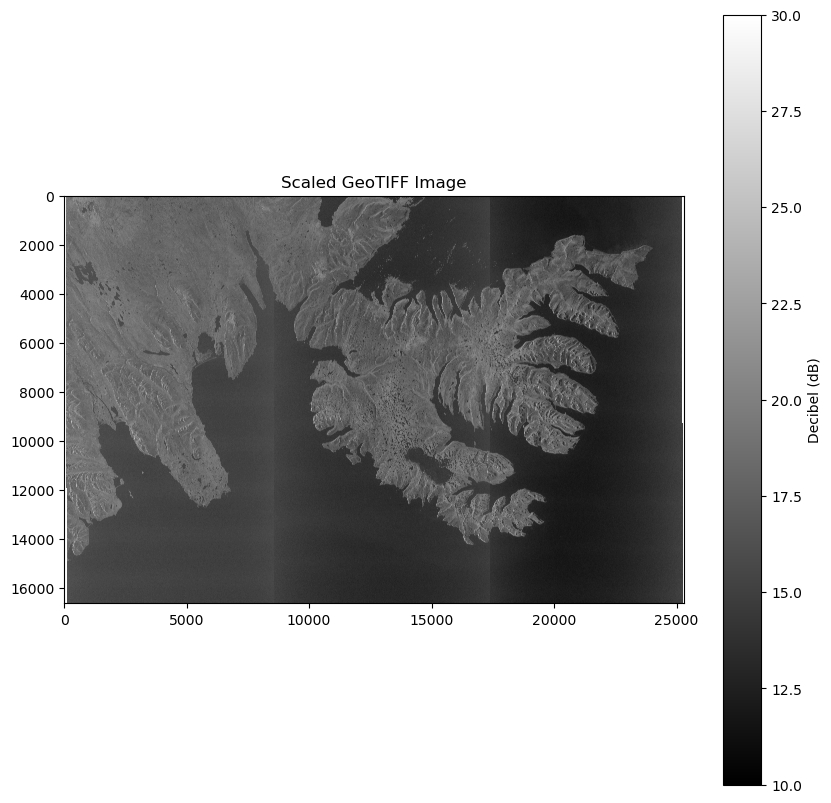

In [12]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal

def load_and_scale_geotiff(image_path):
    dataset = gdal.Open(image_path)
    band = dataset.GetRasterBand(1)
    arr = band.ReadAsArray()
    nodata = band.GetNoDataValue()

    # Aplicar un filtro para manejar valores nodata
    arr = np.where(arr == nodata, np.nan, arr)
    
    # Escalar usando log10 para mejorar la visualización
    arr = 10 * np.log10(arr)
    arr = np.clip(arr, 10, 30)  # Limitar los valores para mejorar la visualización

    return arr

# Cargar y escalar la imagen
image_path = "../../data/GRD/validation/S1B_IW_GRDH_1SDV_20200803T075721_20200803T075746_022756_02B2FF_033A.SAFE/measurement/s1b-iw-grd-vh-20200803t075721-20200803t075746-022756-02b2ff-002_SARFish.tiff"
scaled_image = load_and_scale_geotiff(image_path)

# Visualizar la imagen
plt.figure(figsize=(10, 10))
plt.imshow(scaled_image, cmap='gray')
plt.colorbar(label='Decibel (dB)')
plt.title('Scaled GeoTIFF Image')
plt.show()


/tmp/ipykernel_24516/4256694220.py:19: RuntimeWarning: divide by zero encountered in log10
  arr = 10 * np.log10(arr)


SLC swath 1 loading time: 15.646990776062012 seconds.


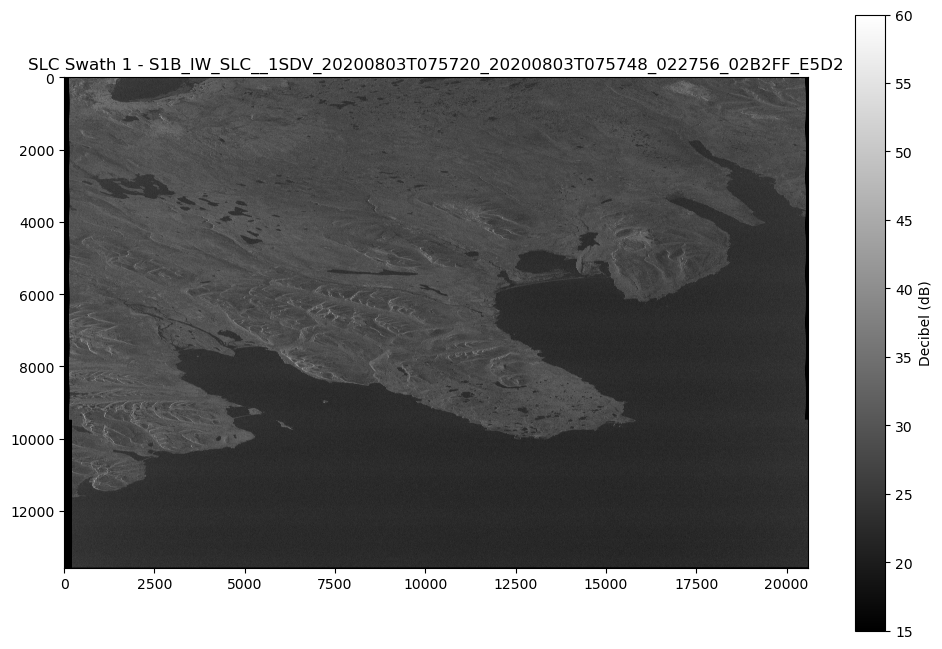

SLC swath 2 loading time: 16.147958040237427 seconds.


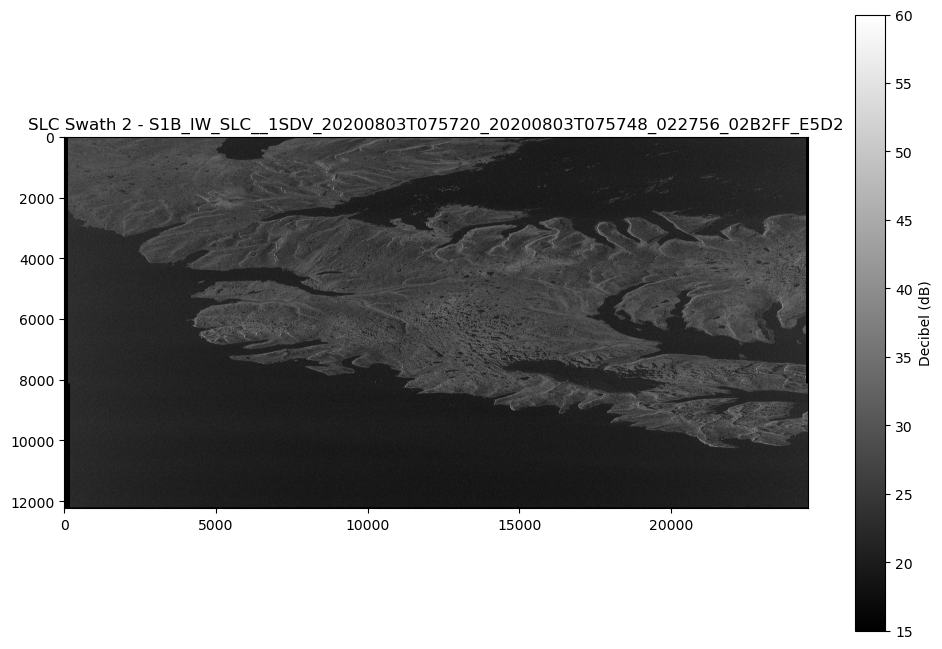

SLC swath 3 loading time: 20.213431358337402 seconds.


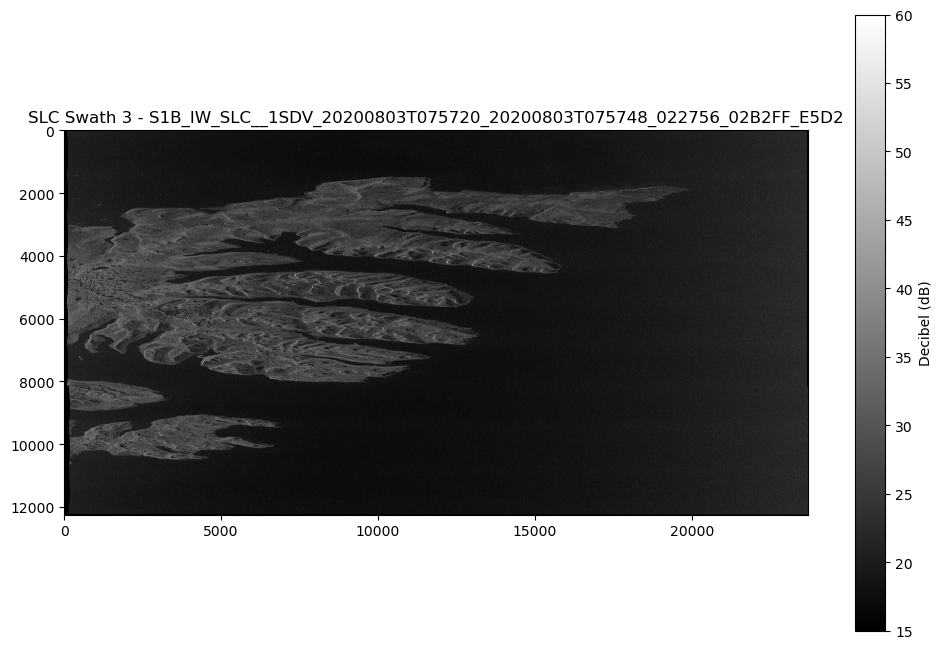

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
from pathlib import Path
from time import time

def load_and_scale_geotiff(image_path, product_type):
    dataset = gdal.Open(image_path)
    band = dataset.GetRasterBand(1)
    arr = band.ReadAsArray()
    nodata = band.GetNoDataValue()

    # Aplicar un filtro para manejar valores nodata
    arr = np.where(arr == nodata, np.nan, arr)
    
    # Aplicar escalado específico
    if product_type == "SLC":
        arr = np.abs(arr) ** 2  # Detecction
    arr = 10 * np.log10(arr)
    
    return arr

def plot_geotiff(data, title, vmin, vmax):
    plt.figure(figsize=(12, 8))
    plt.imshow(data, cmap='gray', vmin=vmin, vmax=vmax)
    plt.colorbar(label='Decibel (dB)')
    plt.title(title)
    plt.show()

SLC_plots = []
for swath_index in [1, 2, 3]:
    start = time()
    
    measurement_path_SLC = Path(
        SARFish_root_directory, "SLC", correspondence['DATA_PARTITION'], f"{correspondence['SLC_product_identifier']}.SAFE",
        "measurement", correspondence[f'SLC_swath_{swath_index}_vh']
    )
    
    data_SLC = load_and_scale_geotiff(str(measurement_path_SLC), "SLC")
    clipped_scaled_data_SLC = np.clip(data_SLC, 15, 60)
    
    stop = time()
    print(f"SLC swath {swath_index} loading time: {stop - start} seconds.")

    plot_title = f"SLC Swath {swath_index} - {correspondence['SLC_product_identifier']}"
    plot_geotiff(clipped_scaled_data_SLC, plot_title, 15, 60)

    # En este caso no guardamos los objetos de la trama ya que matplotlib no los mantiene de manera interactiva como Vispy
    clipped_scaled_data_SLC = None  # Limpiar después de plotear
